# Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Load and preprocess data:

In [3]:
df = pd.read_csv("milknew.csv")
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
df.rename(columns={'Temprature':'Temperature'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
X = df.drop('Grade', axis=1)
y = df['Grade']

## Data Resampling and Model Building:

In [21]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
rf_model = RandomForestClassifier(random_state = 1)
accuracy_ls, class_ls, disp_ls, feature_ls = [], [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'bootstrap': [True, False]
    }
    grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, n_jobs = -1, verbose = 1, scoring = 'accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_re = classification_report(y_test, y_pred)
    importance = best_model.feature_importances_
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)

    accuracy_ls.append(accuracy)
    class_ls.append(class_re)
    disp_ls.append(disp)
    feature_ls.append(importance)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


## Results and Plots

The accuracy score of the first model is: 1.0
Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00        44
         low       1.00      1.00      1.00        92
      medium       1.00      1.00      1.00        76

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

Feature Importances:
 [0.40149421 0.2194405  0.04491461 0.08585385 0.08973682 0.08803807
 0.07052193]


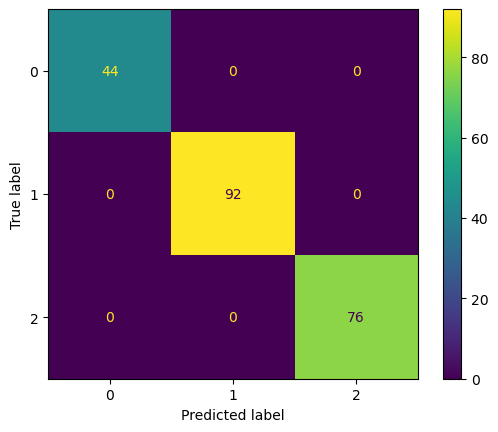

In [25]:
print("The accuracy score of the first model is:", accuracy_ls[0])
print("Classification Report:\n", class_ls[0])
print("Feature Importances:\n", feature_ls[0])
disp_ls[0].plot()

The accuracy score of the second model is: 1.0
Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00        56
         low       1.00      1.00      1.00        91
      medium       1.00      1.00      1.00        65

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

Feature Importances:
 [0.39602436 0.21453448 0.04668833 0.08297475 0.08877069 0.09084261
 0.08016478]


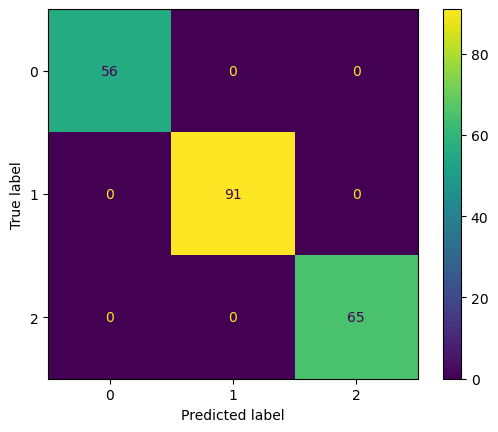

In [27]:
print("The accuracy score of the second model is:", accuracy_ls[1])
print("Classification Report:\n", class_ls[1])
print("Feature Importances:\n", feature_ls[1])
disp_ls[1].plot()

The accuracy score of the third model is: 0.9952830188679245
Classification Report:
               precision    recall  f1-score   support

        high       0.98      1.00      0.99        53
         low       1.00      0.99      0.99        74
      medium       1.00      1.00      1.00        85

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212

Feature Importances:
 [0.4172309  0.22513699 0.04456696 0.07252515 0.08763406 0.09033006
 0.06257588]


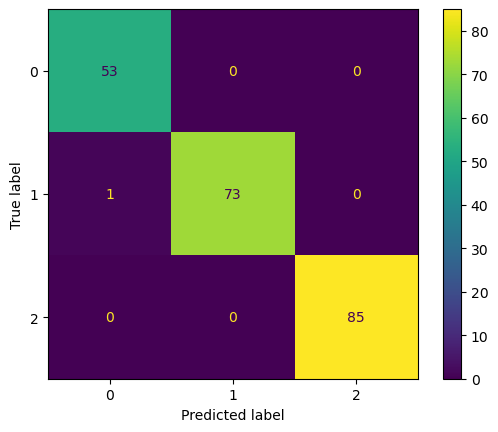

In [29]:
print("The accuracy score of the third model is:", accuracy_ls[2])
print("Classification Report:\n", class_ls[2])
print("Feature Importances:\n", feature_ls[2])
disp_ls[2].plot()

The accuracy score of the fourth model is: 0.9952830188679245
Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.98      0.99        55
         low       1.00      1.00      1.00        81
      medium       0.99      1.00      0.99        76

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212

Feature Importances:
 [0.39649601 0.23597472 0.04876469 0.071687   0.08601068 0.08736945
 0.07369745]


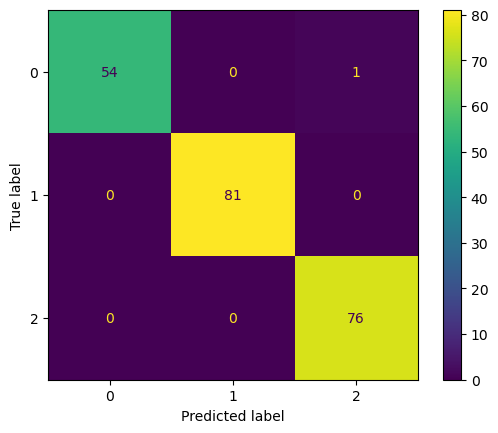

In [31]:
print("The accuracy score of the fourth model is:", accuracy_ls[3])
print("Classification Report:\n", class_ls[3])
print("Feature Importances:\n", feature_ls[3])
disp_ls[3].plot()

The accuracy score of the fifth model is: 1.0
Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00        48
         low       1.00      1.00      1.00        91
      medium       1.00      1.00      1.00        72

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

Feature Importances:
 [0.37535485 0.24104793 0.05350632 0.07518829 0.08934493 0.09410493
 0.07145276]


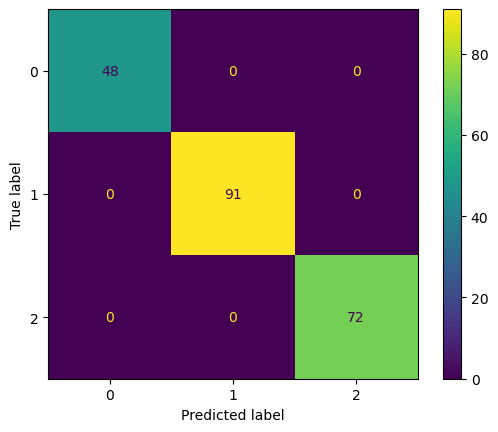

In [33]:
print("The accuracy score of the fifth model is:", accuracy_ls[4])
print("Classification Report:\n", class_ls[4])
print("Feature Importances:\n", feature_ls[4])
disp_ls[4].plot()

According to the feature importances, the feature "pH" is the most important feature among all features.